## Final Project Submission

Please fill out:
* Student name: Konnor Clark
* Student pace: self paced
* Scheduled project review date/time: 08.22.2022
* Instructor name: Joe
* Blog post URL: TBD


# Top Films and Genres from 2010 to the Present

## Project Goal

My project aims to discover the top films, studios, and genres to inform best practice for our new movie studio.

## Data Source and Data Exploration

This data comes from __[Box Office Mojo](www.boxofficemojo.com)__ and the __[Internet Movie Database](www.imdb.com)__ (a.k.a. IMDB). 

The primary columns I used from these databases to determine movie success were

- the domestic gross
- the foreign gross
- the number of review ratings
- the average rating

Taking these variables into consideration, I investigated the top film titles, studios, and film genres. 


## Previewing and Cleaning the Data (Box Office Mojo)
First, I simply want to see and clean up the data. 

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bom = pd.read_csv('bom.movie_gross.csv.gz')
# bom_df.head()
# bom_df.tail()
bom.head()
#bom has columns title, studio, domestic gross, foreign gross, and year (2010-2018)
#3387 have title and year, but 5 don't have studio information, 28 no domestic gross info, and 1350 no foreign gross info

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#Filling in the null values with 0
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)


In [4]:
#converting to integers
bom['domestic_gross'] = bom['domestic_gross'].astype('int')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   int32 
 3   foreign_gross   2037 non-null   object
 4   year            3387 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 119.2+ KB


In [5]:
bom.columns = bom.columns.str.strip()

In [6]:
#Filling the null values with 0, replacing extra commas with nothing, converting to float since these are strings with decimals,
#and then converting to integers.  
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)
bom['foreign_gross'] = bom['foreign_gross'].replace(',','', regex=True)
bom['foreign_gross'] = bom['foreign_gross'].astype('float')
bom['foreign_gross'] = bom['foreign_gross'].astype('int')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   int32 
 3   foreign_gross   3387 non-null   int32 
 4   year            3387 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 106.0+ KB


In [7]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


# Manipulating the Data

### Adding a total_gross column and one adjusting for inflation

In [8]:
#Creating a total gross colum. Still ranges from 2010-2018, so total_gross needs to be adjusted for inflation up through 2017.
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   int32 
 3   foreign_gross   3387 non-null   int32 
 4   year            3387 non-null   int64 
 5   total_gross     3387 non-null   int32 
dtypes: int32(3), int64(1), object(2)
memory usage: 119.2+ KB


In [9]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


I decided to add a column for total gross after adjusting for inflation based on __[this site's inflation calculator](https://www.usinflationcalculator.com/)__ .

In [10]:
#Function adjusting total_gross column for inflation
def inflation(row):
    if row['year'] == 2010:
        val = row['total_gross']*1.152
        return val
    elif row['year'] == 2011:
        val2 = row['total_gross']*1.116
        return val2
    elif row['year'] == 2012:
        val3 = row['total_gross']*1.094
        return val3
    elif row['year'] == 2013:
        val4 = row['total_gross']*1.078
        return val4
    elif row['year'] == 2014:
        val5 = row['total_gross']*1.061
        return val5
    elif row['year'] == 2015:
        val6 = row['total_gross']*1.059
        return val6
    elif row['year'] == 2016:
        val7 = row['total_gross']*1.046
        return val7
    elif row['year'] == 2017:
        val8 = row['total_gross']*1.024
        return val8
    else:
        return row['total_gross']
        
bom['total_gross_inf_adj'] = bom.apply(inflation, axis=1)



In [11]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross_inf_adj
0,Toy Story 3,BV,415000000,652000000,2010,1067000000,1.229184e+09
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000,1.181376e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000,1.106266e+09
3,Inception,WB,292600000,535700000,2010,828300000,9.542016e+08
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000,8.669952e+08


In [12]:
#changing total_gross_inf_adj to int
bom['total_gross_inf_adj'] = bom['total_gross_inf_adj'].astype('int')

# Finding and Visualizing the Top Grossing Films

In [13]:
bom['total_gross_inf_adj'].describe()
#highest quartile is 65.72 million and above

count    3.387000e+03
mean     7.850737e+07
std      1.814086e+08
min      1.070000e+02
25%      2.975235e+05
50%      5.857852e+06
75%      6.572340e+07
max      1.661677e+09
Name: total_gross_inf_adj, dtype: float64

In [14]:
#To see the difference, here is the information without adjusting for inflation, which shows some significance
bom['total_gross'].describe()
#highest quartile is 61.35 million and above.

count    3.387000e+03
mean     7.353800e+07
std      1.705091e+08
min      1.000000e+02
25%      2.740000e+05
50%      5.475000e+06
75%      6.135000e+07
max      1.518900e+09
Name: total_gross, dtype: float64

In [15]:
#taking the top 25% of total grossing films (adjusting for inflation), which are 847 films. 
bom_top = bom[bom['total_gross_inf_adj'] >= 65723400] #the highest quartile from above
bom_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 3164
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                847 non-null    object
 1   studio               846 non-null    object
 2   domestic_gross       847 non-null    int32 
 3   foreign_gross        847 non-null    int32 
 4   year                 847 non-null    int64 
 5   total_gross          847 non-null    int32 
 6   total_gross_inf_adj  847 non-null    int32 
dtypes: int32(4), int64(1), object(2)
memory usage: 39.7+ KB


In [16]:
#arranging from highest to lowest
bom_top = bom_top.sort_values(by=['total_gross_inf_adj'], ascending=False)
bom_top = bom_top.reset_index(drop=True)
bom_top.head(15)

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross_inf_adj
0,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000,1661676600
1,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,2011,1341500000,1497114000
2,Avengers: Age of Ultron,BV,459000000,946400000,2015,1405400000,1488318600
3,Frozen,BV,400700000,875700000,2013,1276400000,1375959200
4,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000,1364582400
5,Black Panther,BV,700100000,646900000,2018,1347000000,1347000000
6,Iron Man 3,BV,409000000,805800000,2013,1214800000,1309554400
7,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000,2018,1309500000,1309500000
8,Beauty and the Beast (2017),BV,504000000,759500000,2017,1263500000,1293824000
9,Transformers: Dark of the Moon,P/DW,352400000,771400000,2011,1123800000,1254160800


### Visualization of the Top Grossing Films

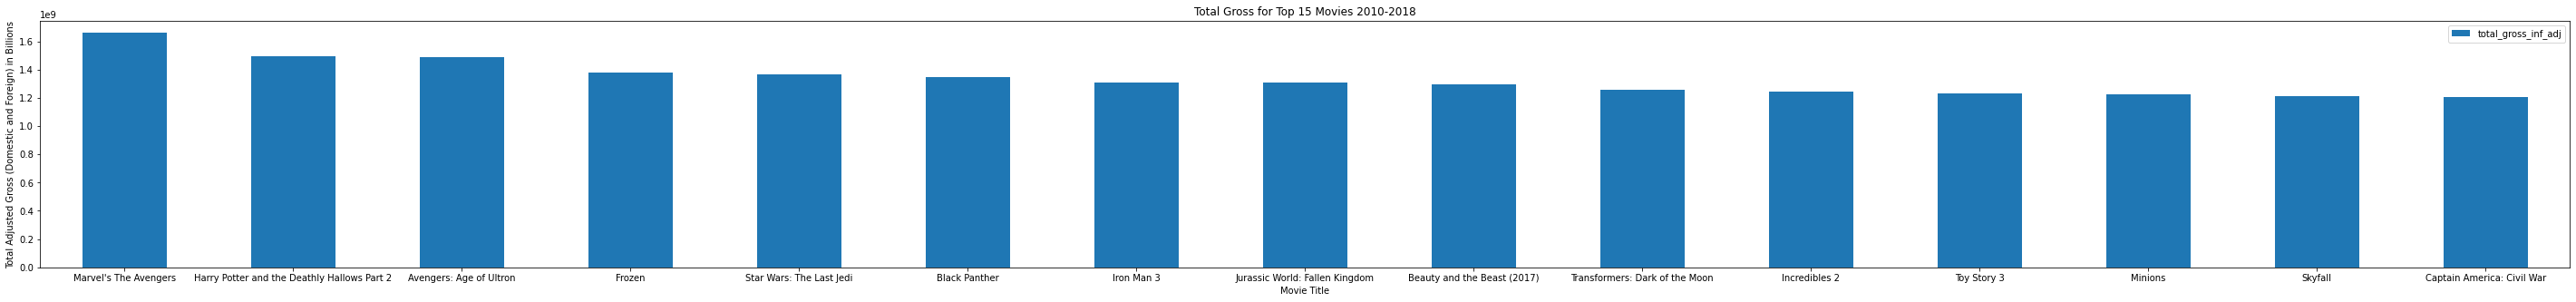

In [17]:
bom_top_15 = bom_top.drop(columns=['studio', 'domestic_gross', 'foreign_gross', 'year', 'total_gross']).head(15)
bom_top_15.set_index('title').plot.bar(rot=0,
                                       figsize=(50, 5),
                                       xlabel='Movie Title', 
                                       ylabel='Total Adjusted Gross (Domestic and Foreign) in Billions', 
                                       title='Total Gross for Top 15 Movies 2010-2018');

# Finding the Top Grossing Studios

In [18]:
#Creating a new dataframe that adds together the studios total gross
studio_gross = bom_top.groupby('studio').sum().sort_values(by=['total_gross_inf_adj'], ascending=False)
studio_gross =  studio_gross.reset_index()
studio_gross = studio_gross.drop(columns=['domestic_gross', 'foreign_gross', 'year', 'total_gross'])
studio_gross.head()
#Top 25% of studios grossed $2,539,935,000 and above. 

,studio,total_gross_inf_adj
0,BV,4.619773e+10
1,Fox,3.205943e+10
2,WB,3.146808e+10
3,Uni.,3.046523e+10
4,Sony,2.312599e+10


In [19]:
studio_gross.describe()
#Top 25% of studios grossed $2,539,935,000 and above.

,total_gross_inf_adj
count,5.100000e+01
mean,4.729197e+09
std,1.015859e+10
min,6.575800e+07
25%,1.566140e+08
50%,4.587946e+08
75%,2.539935e+09
max,4.619773e+10


In [20]:
top_studio_gross = studio_gross[studio_gross['total_gross_inf_adj'] >= 2539935000]
top_studio_gross
#Top 13 studios

,studio,total_gross_inf_adj
0,BV,4.619773e+10
1,Fox,3.205943e+10
2,WB,3.146808e+10
3,Uni.,3.046523e+10
4,Sony,2.312599e+10
5,Par.,2.017875e+10
6,WB (NL),1.061395e+10
7,LGF,7.378605e+09
8,P/DW,5.677150e+09
9,LG/S,5.215932e+09


### Visualizing the Top Grossing Studios

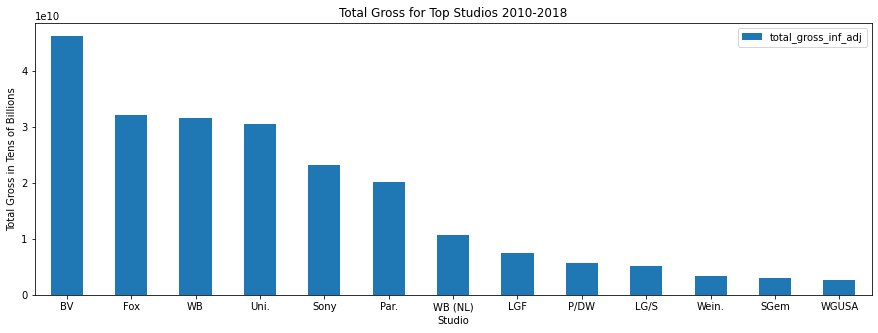

In [21]:
#graphing top 13 studios and their total gross
top_studio_gross.set_index('studio').plot.bar(rot=0,
                                              figsize=(15,5),
                                              xlabel='Studio', 
                                              ylabel='Total Gross in Tens of Billions', 
                                              title='Total Gross for Top Studios 2010-2018');

# Previewing and Cleaning the Data (IMDB)

I first wanted to create a dataframe that joined relevant information from the movie_basics and  movie_ratings tables.

In [22]:
conn = sqlite3.connect('im.db')
# pd.read_sql("""
# """, conn)
imdb = pd.read_sql("""SELECT movie_id, primary_title, start_year, runtime_minutes, genres, mr.averagerating, mr.numvotes
    FROM movie_basics
    JOIN movie_ratings mr
        USING(movie_id)
    ORDER BY numvotes DESC
""", conn)
#in movie_basics, imdb has title, start_year (2010-2027), runtime, and genre
#it includes movies that have not been released yet, including one seemingly made up one set to be released in 2115
#I'll remove ones that include "Untitled" in the title, and ones that occur after 2022, so we can have a similar
#timeline with the bom data. May run a separate 2010-2019 analysis (pre-pandemic), and then see how that may have changed 
#2020-2022
#The number of votes for rating is as low as 5 and as high as 1841066. 
#I'll use average rating as a measure of success, but I'll have to consider the number of votes for those ratings
#for those ratings to mean much. 
#146144 under movie_basics
#73856 when joined with movie_ratings (same with movie_ratings alone)

In [23]:
imdb

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...
73851,tt9899880,Columbus,2018,85.0,Comedy,5.8,5
73852,tt9903952,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5
73853,tt9905796,July Kaatril,2019,NaN,Romance,9.0,5
73854,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5


### Finding the Highest and Most Reviewed Numbers
The most relevant and intersting information to me first was the averagerating and numvotes columns, which should be taken 
together

In [24]:
imdb['numvotes'].describe()
#Top 25% of numvotes is 282 and up. 

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [25]:
imdb['averagerating'].describe()
#Top 25% of ratings is 7.4 and above

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

### Reducing the Data to the Top Reviewed

In [26]:
imdb_top_numvotes = imdb[imdb['numvotes'] >= 282]

In [27]:
imdb_top = imdb_top_numvotes[imdb_top_numvotes['averagerating'] >= 7.4]
#cross-referencing highest 25% for numvotes and averagerating

In [28]:
imdb_top.info()
#From 73856 movies total to 2409 top movies based on numvotes and averagerating

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 0 to 18478
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2409 non-null   object 
 1   primary_title    2409 non-null   object 
 2   start_year       2409 non-null   int64  
 3   runtime_minutes  2402 non-null   float64
 4   genres           2405 non-null   object 
 5   averagerating    2409 non-null   float64
 6   numvotes         2409 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 150.6+ KB


In [29]:
imdb_top

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...
18434,tt4019578,Rege,2014,111.0,"Crime,Drama,Thriller",7.5,283
18439,tt5601424,Tattoo Girls,2018,104.0,Documentary,8.6,283
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282


### Visualizing the Top Rated Films

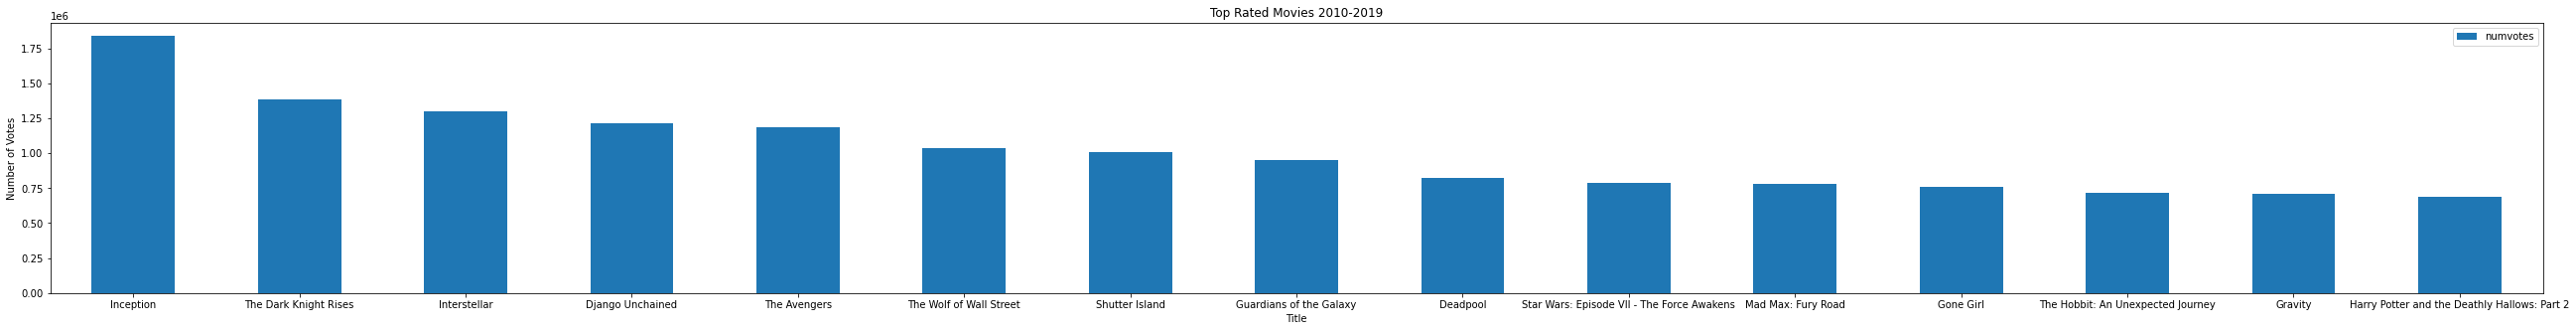

In [30]:
imdb_top_15 = imdb_top.drop(columns=['movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating']).head(15)
imdb_top_15.set_index('primary_title').plot.bar(rot=0,
                                                figsize=(45, 5),
                                                xlabel='Title', 
                                                ylabel=('Number of Votes'),
                                                title='Top Rated Movies 2010-2019');

# Looking at Genres

In [31]:
imdb_top.genres.value_counts().head(10)
#Several multi-genred films exist, so I think I'd like to see how many of each genre is referenced individually first. 

Documentary                    331
Drama                          298
Comedy,Drama                   107
Drama,Romance                   75
Documentary,Music               69
Comedy,Drama,Romance            51
Biography,Documentary           40
Comedy                          37
Action,Adventure,Animation      33
Biography,Documentary,Music     32
Name: genres, dtype: int64

In [32]:
imdb_top['genres_split']= imdb_top['genres'].str.split(",")

<ipython-input-32-5ca659a3b502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_top['genres_split']= imdb_top['genres'].str.split(",")


In [33]:
imdb_top

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,"[Action, Adventure, Sci-Fi]"
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,"[Action, Thriller]"
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,"[Adventure, Drama, Sci-Fi]"
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,"[Drama, Western]"
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...
18434,tt4019578,Rege,2014,111.0,"Crime,Drama,Thriller",7.5,283,"[Crime, Drama, Thriller]"
18439,tt5601424,Tattoo Girls,2018,104.0,Documentary,8.6,283,[Documentary]
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,"[Adventure, Animation, Family]"
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,"[Documentary, Drama]"


In [34]:
imdb_top_genres = imdb_top.explode("genres_split")

In [35]:
imdb_top_genres

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Adventure
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Sci-Fi
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Action
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Thriller
...,...,...,...,...,...,...,...,...
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Animation
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Family
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Documentary
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Drama


In [36]:
imdb_top_genres

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Adventure
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Sci-Fi
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Action
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Thriller
...,...,...,...,...,...,...,...,...
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Animation
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Family
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Documentary
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Drama


In [37]:
solo_genres = imdb_top_genres['genres_split'].value_counts()
solo_genres
#The top individual genres of the most and highest reviewed films. 

Drama          1235
Documentary     797
Comedy          424
Action          311
Biography       310
Romance         245
Thriller        232
Crime           208
History         189
Adventure       188
Music           147
Animation       130
Family          102
Sport           100
Mystery          93
Fantasy          63
War              58
Horror           50
Sci-Fi           47
Musical          32
News             29
Western           4
Name: genres_split, dtype: int64

### Creating a DataFrame to Graph

In [38]:
solo_genres_df = solo_genres.to_frame(name='number')

In [39]:
solo_genres_df.reset_index(inplace=True)

In [40]:
solo_genres_df = solo_genres_df.rename(columns={'index': 'genre'})

In [41]:
solo_genres_df.head()

,genre,number
0,Drama,1235
1,Documentary,797
2,Comedy,424
3,Action,311
4,Biography,310


### Visualizing the Top Individual Genres of the Top Rated Films

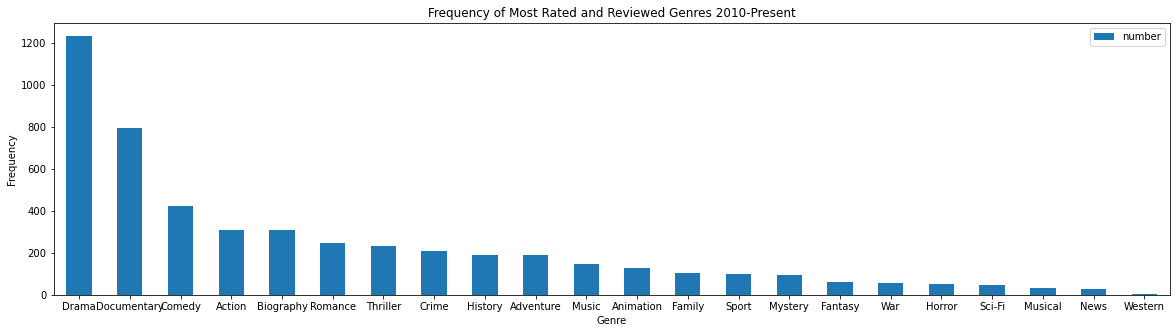

In [42]:
solo_genres_df.set_index('genre').plot.bar(rot=0,
                                           figsize=(20,5),
                                           xlabel='Genre', 
                                           ylabel='Frequency', 
                                           title='Frequency of Most Rated and Reviewed Genres 2010-Present');

### Multi-Genred
I thought it may be useful to still see the genres as they were given in imdb, just in case that could provide some insight. 

In [43]:
multi_genres = imdb_top['genres'].value_counts()
multi_genres

Documentary                  331
Drama                        298
Comedy,Drama                 107
Drama,Romance                 75
Documentary,Music             69
                            ... 
Action,Adventure,History       1
Animation,Biography,Crime      1
Drama,Romance,War              1
Romance,War                    1
Comedy,Crime,Documentary       1
Name: genres, Length: 294, dtype: int64

In [44]:
multigenres_df = multi_genres.to_frame(name='number')

In [45]:
multigenres_df.reset_index(inplace=True)

In [46]:
multigenres_df = multigenres_df.rename(columns={'index': 'genre'})

In [47]:
multigenres_df = multigenres_df.head(10)

### Visualization of Most Common Multi-Genres in Top Rated Films

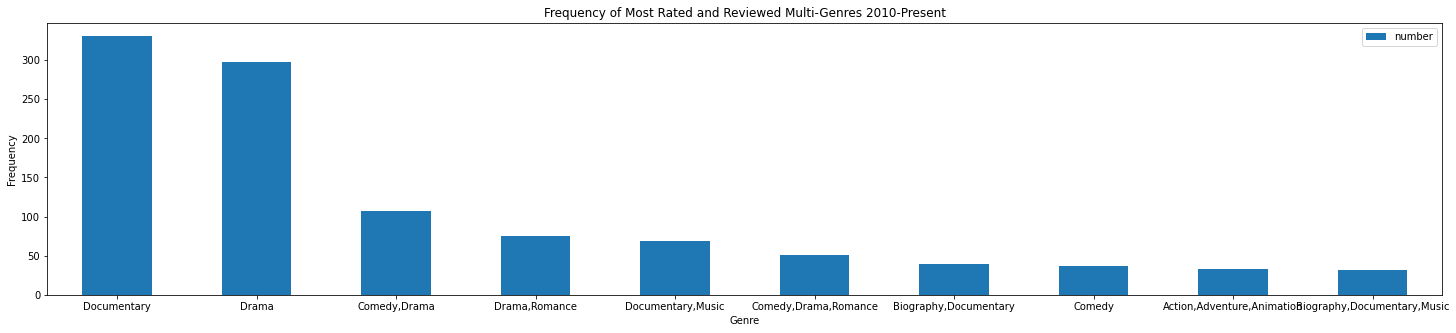

In [48]:
multigenres_df.set_index('genre').plot.bar(rot=0,
                                           figsize=(25,5),
                                           xlabel='Genre', 
                                           ylabel='Frequency', 
                                           title='Frequency of Most Rated and Reviewed Multi-Genres 2010-Present');

# Post Pandemic
I thought it may be useful to see the information we've looked at so far through the lens of the pandemic, which could inform
practice.

In [49]:
imdb_top_genres

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Adventure
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Sci-Fi
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Action
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Thriller
...,...,...,...,...,...,...,...,...
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Animation
18443,tt7955106,Allahyar and the Legend of Markhor,2018,90.0,"Adventure,Animation,Family",8.0,283,Family
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Documentary
18456,tt2433448,Best Kept Secret,2013,85.0,"Documentary,Drama",7.5,282,Drama


In [50]:
imdb_pan = imdb_top_genres[(imdb_top_genres.start_year >= 2019)]

In [51]:
imdb_pan
#Top reviewed and rated films of 2020-2022

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
85,tt4154796,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,Action
85,tt4154796,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,Adventure
85,tt4154796,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,Sci-Fi
564,tt0448115,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051,Action
564,tt0448115,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051,Adventure
...,...,...,...,...,...,...,...,...
17942,tt9894394,Upin & Ipin: The Lone Gibbon Kris,2019,100.0,Animation,8.1,301,Animation
18238,tt6344664,Code Geass: Lelouch of the Re;Surrection,2019,112.0,"Action,Adventure,Animation",8.0,290,Action
18238,tt6344664,Code Geass: Lelouch of the Re;Surrection,2019,112.0,"Action,Adventure,Animation",8.0,290,Adventure
18238,tt6344664,Code Geass: Lelouch of the Re;Surrection,2019,112.0,"Action,Adventure,Animation",8.0,290,Animation


In [52]:
imdb_pan.genres_split.value_counts()

Drama          53
Action         20
Documentary    16
Comedy         16
Thriller       12
Crime          12
Adventure       7
Romance         7
Biography       5
Music           5
Animation       4
Family          3
Mystery         3
Horror          3
Sci-Fi          2
History         2
War             2
Sport           2
Fantasy         2
Musical         1
Name: genres_split, dtype: int64

In [53]:
imdb_pan_df = imdb_pan.genres_split.value_counts().to_frame(name='number')

In [54]:
imdb_pan_df.reset_index(inplace=True)

In [55]:
imdb_pan_df = imdb_pan_df.rename(columns={'index': 'genre'})

In [56]:
imdb_pan_df

,genre,number
0,Drama,53
1,Action,20
2,Documentary,16
3,Comedy,16
4,Thriller,12
5,Crime,12
6,Adventure,7
7,Romance,7
8,Biography,5
9,Music,5


### Visualizing the Top Individual Genres Since the Pandemic

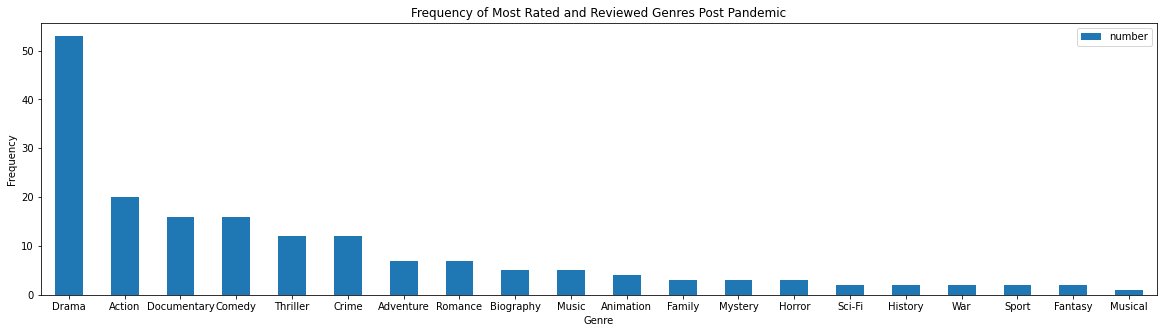

In [57]:
imdb_pan_df.set_index('genre').plot.bar(rot=0,
                                           figsize=(20,5),
                                           xlabel='Genre', 
                                           ylabel='Frequency', 
                                           title='Frequency of Most Rated and Reviewed Genres Post Pandemic');

In [58]:
imdb_pan.genres.value_counts()

Drama                          20
Action,Crime,Drama             12
Documentary                    11
Comedy,Drama,Romance            9
Action,Adventure,Sci-Fi         6
Action,Drama                    6
Action,Adventure,Animation      6
Action,Crime,Thriller           6
Thriller                        5
Comedy                          5
Drama,Music                     4
Comedy,Drama                    4
Drama,Thriller                  4
Documentary,Music               4
Action,Adventure,Comedy         3
Action,Drama,History            3
Action,Drama,War                3
Biography,Drama,Mystery         3
Drama,Musical,Romance           3
Drama,Mystery,Thriller          3
Biography,Drama,Music           3
Drama,Fantasy,Horror            3
Animation,Fantasy,Romance       3
Adventure,Comedy,Family         3
Biography,Documentary,Sport     3
Action,Comedy,Drama             3
Biography,Crime,Drama           3
Comedy,Crime,Drama              3
Crime,Drama,Mystery             3
Crime,Drama,Ho

In [59]:
imdb_pan_multi_df = imdb_pan.genres.value_counts().to_frame(name='number')

In [60]:
imdb_pan_multi_df.reset_index(inplace=True)

In [61]:
imdb_pan_multi_df = imdb_pan_multi_df.rename(columns={'index': 'genre'})

In [62]:
imdb_pan_multi_df = imdb_pan_multi_df.head(10)

### Visualizing the Top MultiGenres Since the Pandemic

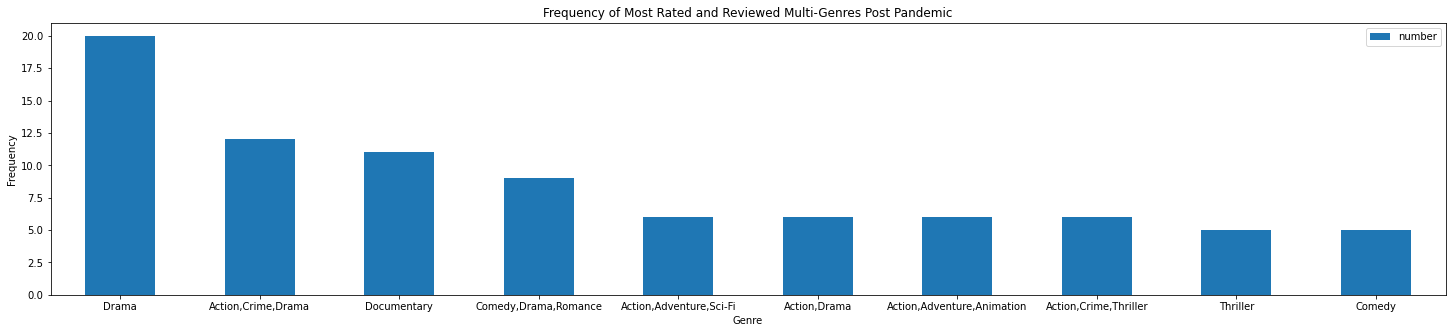

In [63]:
imdb_pan_multi_df.set_index('genre').plot.bar(rot=0,
                                           figsize=(25,5),
                                           xlabel='Genre', 
                                           ylabel='Frequency', 
                                           title='Frequency of Most Rated and Reviewed Multi-Genres Post Pandemic');

# Conclusion

Utilizing the variables of total gross, number of reviews, and ratings, I determined the following:

- the highest grossing films (adjusting for inflation)
- the highest grossing studios (adjusting for inflation)
- the highest rated films
- the highest rated genres
- the highest rated genres since the pandemic began

### Three Recommendations:
1. The highest grossing films have the highest potential appeal for customers and most of them are part of a franchise: Marvel, Harry Potter, Star Wars, Jurassic Park, Transformers, Incredibles, Toy Story, Minions.  These films all are or have sequels, or a part of a franchise with multiple films capitalizing on a created universe.  These are the kinds of films that will bring in the highest dollars. 

1. The highest grossing studios have the best business models that should inform our practice for our own studio. The business strategies of these studios should be carefully scrutinized to determine and emulate their methods for success. 

1. The highest rated films and genres generate the most interest from viewers. These are the kinds of films we should consider making, and we may lean into the post-pandemic information a little more heavily to inform studio choices, as they may be the most relevant to success today. The top genres overall were dramas, documentaries, comedies, action movies, and biographies. Post pandemic, the top genres were dramas, action movies, documentaries, and thrillers.  We should consider creating movies within these genre parameters if we want to generate interest and increase our liklihood of achieving high ratings. 